In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train),(x_test,y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
x_train[0].shape

(32, 32, 3)

(50000, 1)

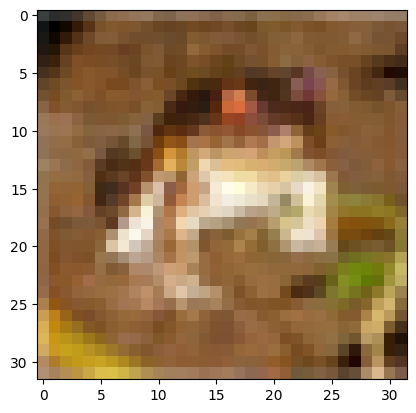

In [4]:
plt.imshow(x_train[0])
y_train.shape

truck


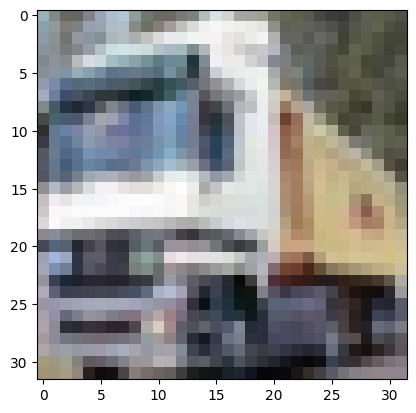

In [5]:
classes = ["airplane","autmobile","bird","cat","deer","dog","frog","horse","ship","truck"]
plt.imshow(x_train[1])
print(classes[y_train[1][0]])

In [6]:
y_train = y_train.reshape(-1,)
x_train = x_train/255
x_test = x_test/255
def plot_sample(x,y,index):
  plt.figure(figsize = (15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

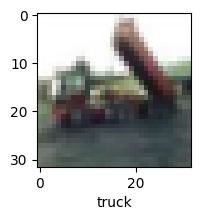

In [7]:
plot_sample(x_train,y_train,2)

In [9]:
cnn = keras.Sequential([
    #CNN
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),

    #Adding some more Convolution layers
    keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),

    #Dense
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(10,activation='softmax'),
])

cnn.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 10s 4ms/step - loss: 1.4520 - accuracy: 0.4802
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1066 - accuracy: 0.6148
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9818 - accuracy: 0.6592
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9041 - accuracy: 0.6883
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8395 - accuracy: 0.7099
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7828 - accuracy: 0.7300
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7447 - accuracy: 0.7411
Epoch 8/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7060 - accuracy: 0.7534
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6693 - accuracy: 0.7669
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.63

In [31]:
cnn.evaluate(x_test,y_test)
y_pred = cnn.predict(x_test)
y_pred[0]

313/313 [==============================] - 1s 2ms/step


array([5.6763070e-05, 1.1112864e-04, 2.5185567e-04, 9.7988611e-01,
       3.3947764e-04, 1.5829988e-02, 3.1438889e-03, 6.5390930e-05,
       1.0991390e-04, 2.0546353e-04], dtype=float32)

In [34]:
y_pred_class = [np.argmax(element) for element in y_pred]
len(y_pred_class)
y_pred_class[:5]

[3, 8, 8, 0, 4]

In [35]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73      1000
           1       0.81      0.80      0.80      1000
           2       0.68      0.51      0.58      1000
           3       0.44      0.54      0.49      1000
           4       0.62      0.70      0.66      1000
           5       0.53      0.65      0.58      1000
           6       0.82      0.69      0.75      1000
           7       0.80      0.69      0.74      1000
           8       0.78      0.83      0.80      1000
           9       0.74      0.80      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



Text(158.22222222222223, 0.5, 'Truth')

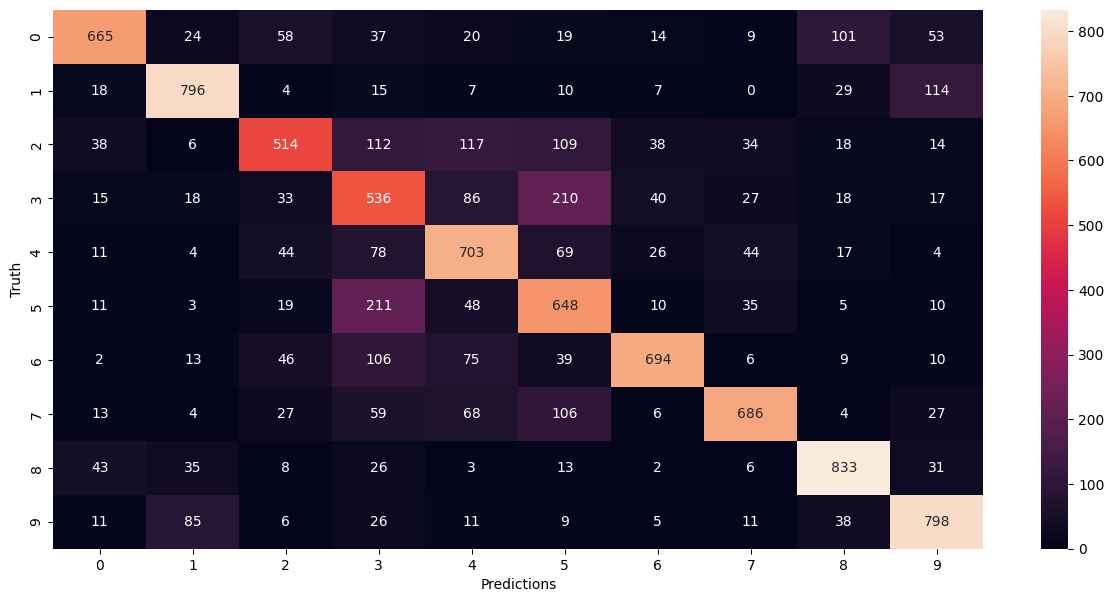

In [36]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_class)
plt.figure(figsize=(15,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predictions')
plt.ylabel('Truth')

In [38]:
y_pred_class[:5]

[3, 8, 8, 0, 4]

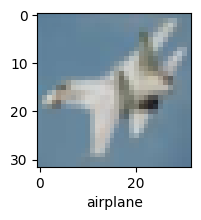

In [41]:
plot_sample(x_test,y_pred_class,10)